#  T M V A_Tutorial_Classification_Tmva_Test
TMVA example, for classification
 with following objectives:
 * Test a BDT with TMVA




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Tuesday, April 27, 2021 at 01:27 AM.</small></i>

In [1]:
from ROOT import TMVA, TFile, TTree, TCut, TH1F, TCanvas, gROOT, TLegend
from subprocess import call
from os.path import isfile
 
gROOT.SetStyle("ATLAS")
 
outfileName = 'TMVA_tutorial_cla_1.root'
tfin = TFile.Open(outfileName, 'READ')

Welcome to JupyROOT 6.22/07


Helper function to fill histograms

In [2]:
def fill_hists(tr, tag):
  nevents = tr.GetEntries()

  nbins, xmin, xmax=20, -1, 1
  hname="BDT_S_{0}".format(tag)
  h1 = TH1F(hname, hname, nbins, xmin, xmax)
  h1.Sumw2()
  hname="BDTG_S_{0}".format(tag)
  h2 = TH1F(hname, hname, nbins, xmin, xmax)
  h2.Sumw2()
  hname="BDT_B_{0}".format(tag)
  h3 = TH1F(hname, hname, nbins, xmin, xmax)
  h3.Sumw2()
  hname="BDTG_B_{0}".format(tag)
  h4 = TH1F(hname, hname, nbins, xmin, xmax)
  h4.Sumw2()
  
  for i in range(nevents):
    tr.GetEntry(i)
 
    BDT = tr.BDT     
    BDTG = tr.BDTG     
    # Signal
    if tr.classID == 0:
      h1.Fill(BDT)
      h2.Fill(BDTG)
    # Background
    if tr.classID == 1:
      h3.Fill(BDT)
      h4.Fill(BDTG)
    
  return [h1, h2, h3, h4]

Helper function to normalize hists

In [3]:
def norm_hists(h):

  h_new = h.Clone()
  hname = h.GetName() + "_normalized"
  h_new.SetName(hname)
  h_new.SetTitle(hname)
  ntot = h.Integral()
  if ntot!=0:
    h_new.Scale(1./ntot)

  return h_new

Fill histograms

In [4]:
tr_train = tfin.Get("dataset/TrainTree")
h_train = fill_hists(tr_train, "train")

tr_test = tfin.Get("dataset/TestTree")
h_test = fill_hists(tr_test, "test")

Plotting

In [5]:
myc = TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)
myc.cd()

Train vs Test
===============
BDT

In [6]:
h1 = norm_hists(h_train[0])
h1.GetXaxis().SetTitle("BDT")
h1.GetYaxis().SetTitle("A.U.")
h1.Draw()
h2 = norm_hists(h_test[0])
h2.Draw("same hist")
h3 = norm_hists(h_train[2])
h3.SetLineColor(2)
h3.SetMarkerColor(2)
h3.Draw("same")
h4 = norm_hists(h_test[2])
h4.SetLineColor(2)
h4.SetMarkerColor(2)
h4.Draw("same hist")

ymin = 0
ymax = max(h1.GetMaximum(), h2.GetMaximum(), h3.GetMaximum(), h4.GetMaximum())
h1.GetYaxis().SetRangeUser(ymin, ymax*1.2)

Draw legends

Info in <TCanvas::Print>: png file TMVA_tutorial_cla_test_1.png has been created


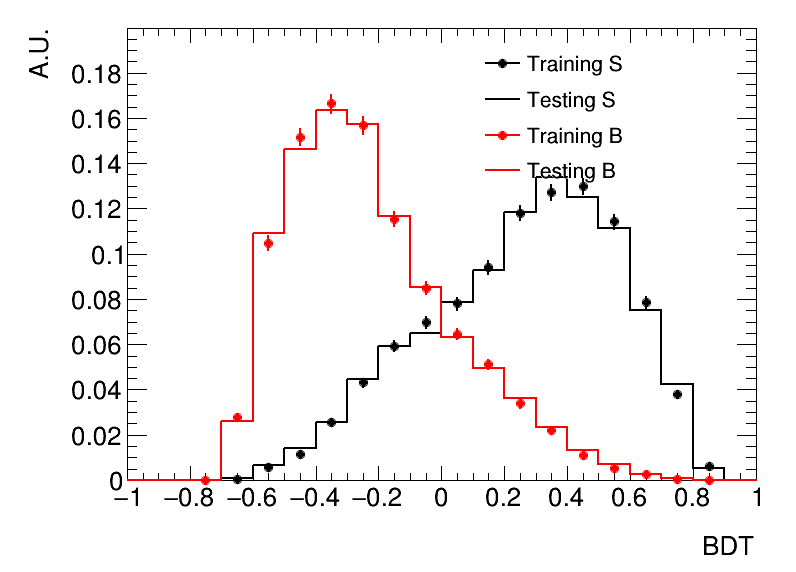

In [7]:
lIy = 0.92
lg = TLegend(0.60, lIy-0.25, 0.85, lIy)
lg.SetBorderSize(0)
lg.SetFillStyle(0)
lg.SetTextFont(42)
lg.SetTextSize(0.04)
lg.AddEntry(h1, "Training S", "lp")
lg.AddEntry(h2, "Testing S", "l")
lg.AddEntry(h3, "Training B", "lp")
lg.AddEntry(h4, "Testing B", "l")
lg.Draw()

myc.Draw()
myc.SaveAs("TMVA_tutorial_cla_test_1.png")

BDTG

In [8]:
h1 = norm_hists(h_train[1])
h1.GetXaxis().SetTitle("BDTG")
h1.GetYaxis().SetTitle("A.U.")
h1.Draw()
h2 = norm_hists(h_test[1])
h2.Draw("same hist")
h3 = norm_hists(h_train[3])
h3.SetLineColor(2)
h3.SetMarkerColor(2)
h3.Draw("same")
h4 = norm_hists(h_test[3])
h4.SetLineColor(2)
h4.SetMarkerColor(2)
h4.Draw("same hist")

ymin = 0
ymax = max(h1.GetMaximum(), h2.GetMaximum(), h3.GetMaximum(), h4.GetMaximum())
h1.GetYaxis().SetRangeUser(ymin, ymax*1.2)

Draw legends

Info in <TCanvas::Print>: png file TMVA_tutorial_cla_test_2.png has been created


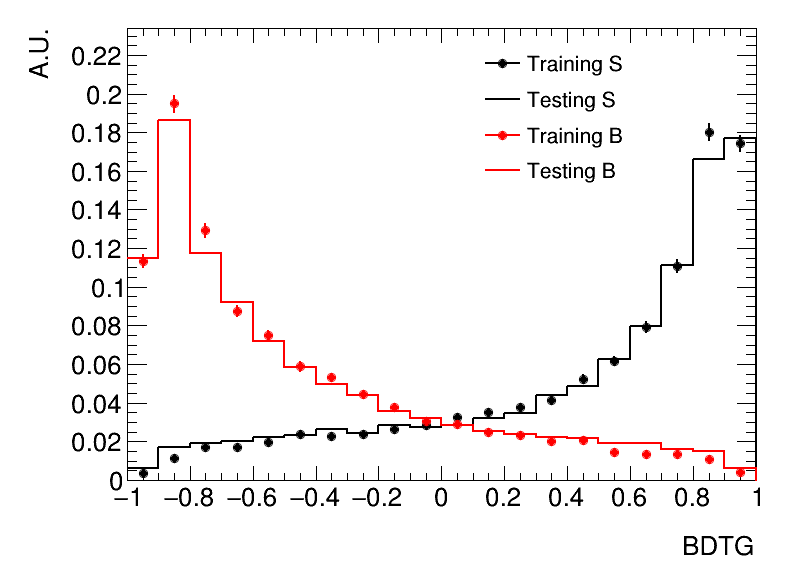

In [9]:
lIy = 0.92
lg = TLegend(0.60, lIy-0.25, 0.85, lIy)
lg.SetBorderSize(0)
lg.SetFillStyle(0)
lg.SetTextFont(42)
lg.SetTextSize(0.04)
lg.AddEntry(h1, "Training S", "lp")
lg.AddEntry(h2, "Testing S", "l")
lg.AddEntry(h3, "Training B", "lp")
lg.AddEntry(h4, "Testing B", "l")
lg.Draw()

myc.Draw()
myc.SaveAs("TMVA_tutorial_cla_test_2.png")

Draw all canvases 

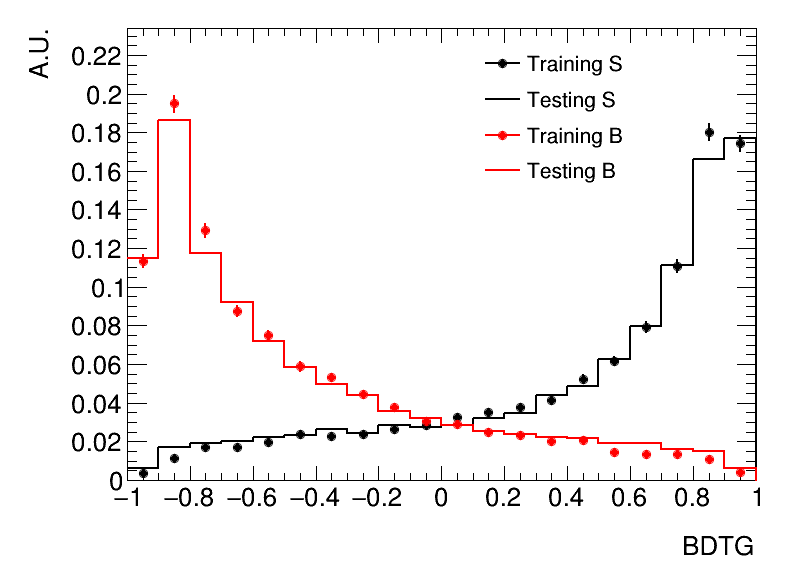

In [10]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()